# Assignment No 1c
###### *Hassan Raza*
----
## Goal

Your goal in this assigment is to implement & understand the mahalanobis distance, covariance matrix and its relationship 
with mahalanobis distance using Python language. This will not only solidify your Python understanding 
but also give you strong footing for further advancement :)

**Note** Please note that can use **numpy and scipy** to complete the tasks. In case you need any help you can post on google classroom.

## Submission Instructions
You are required to submit the original notebook file on the google classroom (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



##  Mahalanobis Distance & Covariance Matrix



Mahalanobis distance (or "generalized squared interpoint distance" for its squared value) can also be defined as a dissimilarity measure between two random column vectors $\vec{x}$ and $\vec{y}$ of the same distribution with the covariance matrix S:


$$    d(\vec{x},\vec{y})=\sqrt{(\vec{x}-\vec{y})^T S^{-1} (\vec{x}-\vec{y})}.\, $$

If the covariance matrix is the identity matrix, the Mahalanobis distance reduces to the Euclidean distance. If the covariance matrix is diagonal, then the resulting distance measure is called a normalized Euclidean distance:
    $$ d(\vec{x},\vec{y})= \sqrt{\sum_{i=1}^N {(x_i - y_i)^2 \over s_{i}^2}}, $$
where $s_i$ is the standard deviation of the $x_i$ and $y_i$ over the sample set.

Detailed Derviation of Mahalanobis distance [For Your Understanding]
-----------------------
Recall from your LA course that eigen vector of a matrix is a vector which is when multiplied with the matrix results only in the scaling of the vector, i.e.$Sp=\lambda p$, here $\lambda$ is called the eigen value and the $p$ is called the eigen vector.

We also know that a $S_{d\times d}$ symmetric matrix has a set of $d$ real eigen vectors, i.e.

$$S_{d\times d}p_1=\lambda_1 p_1$$
$$S_{d\times d}p_2=\lambda_2 p_2$$

We can combine these set of $d$ vectors into a matrix $P$, and write the above expression as 

$$S\begin{bmatrix}\vdots & \vdots  & \cdots& \vdots \\
  p_{1} & p_{2} & \cdots & p_{d} \\
  \vdots & \vdots  & \cdots& \vdots \\
  \end{bmatrix}=\begin{bmatrix}\vdots & \vdots  & \cdots& \vdots \\
  p_{1} & p_{2} & \cdots & p_{d} \\
  \vdots & \vdots  & \cdots& \vdots \\
  \end{bmatrix}\begin{pmatrix}\lambda_{1}\\ & \lambda_{2}\\ & & \ddots\\ & & & \lambda_{d}\end{pmatrix},$$
$$SP=P\Omega$$
here each $i_{th}$ column of $P$ is its $i_{th}$ eigen vector. Since $P$ is an orthogonal matrix thus $P^T=P^{-1}$, We can write the above expression as
$$S=P\Omega P^{T}$$


From above $S^{-1}=(P\Omega P^{T})^{-1}=(P^{-T}\Omega^{-1}P^{-1})=P\Omega^{-1} P^{T}$. Here the $\Omega^{-1}$ is inverse of the diagonal eigen-values matrix and it is equal to:

$$\Omega^{-1}=\begin{pmatrix}\frac{1}{\lambda_{1}}\\ & \frac{1}{\lambda_{2}}\\ & & \ddots\\ & & & \frac{1}{\lambda_{d}}\end{pmatrix}$$ 

Thus the mahalanobis distance between two points $\vec{x}$ and $\vec{y}$ can be written as:

\begin{align}   d(\vec{x},\vec{y})&=\sqrt{(\vec{x}-\vec{y})^T (P\Omega^{-1} P^{T}) (\vec{x}-\vec{y})}.\, \\
&=\sqrt{(\vec{x}-\vec{y})^T P \Omega^{-1} P^{T} (\vec{x}-\vec{y})}.\, \\
&=\sqrt{(\vec{x}-\vec{y})^T P \begin{pmatrix}\frac{1}{\lambda_{1}}\\ & \frac{1}{\lambda_{2}}\\ & & \ddots\\ & & & \frac{1}{\lambda_{d}}\end{pmatrix} P^{T} (\vec{x}-\vec{y})}.\, \\
&=\sqrt{(\vec{x}-\vec{y})^T P \begin{pmatrix}\frac{1}{\sqrt{\lambda_{1}}}\\ & \frac{1}{\sqrt{\lambda_{2}}}\\ & & \ddots\\ & & & \frac{1}{\sqrt{\lambda_{d}}}\end{pmatrix} \begin{pmatrix}\frac{1}{\sqrt{\lambda_{1}}}\\ & \frac{1}{\sqrt{\lambda_{2}}}\\ & & \ddots\\ & & & \frac{1}{\sqrt{\lambda_{d}}}\end{pmatrix}P^{T} (\vec{x}-\vec{y})}.\, \\
&=\sqrt{(\vec{x}-\vec{y})^T P L\; L^{T}P^{T} (\vec{x}-\vec{y})}.\, \\
&=\sqrt{\left((\vec{x}-\vec{y})^T P L\right)\; \left(L^{T}P^{T} (\vec{x}-\vec{y})\right)}.\, \\
&=\sqrt{Z^T\; Z}.\, \\
   \end{align}

Where $Z=(\vec{x}-\vec{y})^T P L$, $L=\begin{pmatrix}\frac{1}{\sqrt{\lambda_{1}}}\\ & \frac{1}{\sqrt{\lambda_{2}}}\\ & & \ddots\\ & & & \frac{1}{\sqrt{\lambda_{d}}}\end{pmatrix}$ $P^{T}=\begin{bmatrix}\cdots&p_1 &\cdots \\
  \cdots&p_2 &\cdots \\
   \cdots&\cdots &\cdots \\
   \cdots&p_d&\cdots 
  \end{bmatrix}$ and $P=\begin{bmatrix}\vdots & \vdots  & \cdots& \vdots \\
  p_{1} & p_{2} & \cdots & p_{d} \\
  \vdots & \vdots  & \cdots& \vdots \\
  \end{bmatrix}$

Recall that norm of difference vector $Z$ is equal to euclidean distance so here we are computing the euclidean distance between the features in the transformed space.

We can further simplify $Z^T$, to see this clearly i.e.

$Z^T= (\vec{x}-\vec{y})^T P L = \vec{x}^T P L-\vec{y}^T P L$

Here each column vector of $P$ is a orthonormal and taking the dot product of $(\vec{x}^T \mbox{ and }\vec{y}^T)$ with each eigen vector is same as projecting it along that vector (recall from projection notes that projecting against orthonormal vector is same as taking dot product with the orthonormal vector) and hence we are transformaing (or rotating) the data axis to be aligned with axis of maximum variance which is being defined by the data.

$L$ is scaling factor and is being used to scale the dimensions according to variance statistic (that is square root of eigen values). Thus Mahalanobis distance can be considered a distance metric that respects the underlying data correlation, as wiki puts "Mahalanobis distance is thus unitless and scale-invariant, and takes into account the correlations of the data set".

This can be written as
$$    d(\vec{x},\vec{y})=\sqrt{X \Omega^{-1} X^{T} }.\, $$ where $X=(\vec{x}-\vec{y})^T P$

#### Sources
-----------------------------
- Wiki [www.Wikipedia.org]
- Machine Learning A Probabilistic Perspective Kevin P. Murphy
- CrossValidated [http://stats.stackexchange.com/questions/62092/bottom-to-top-explanation-of-the-mahalanobis-distance]


# Playing With Covariance Matrix

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [91]:
import pandas as pd

In [92]:
plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (18.0, 10.0)

### Data Generation

In [93]:
#Lets define the covariance matrix for our data generation...
covForData = np.array([[7, 3.0], [3.0, 5.0]])
print (covForData)

[[7. 3.]
 [3. 5.]]


In [94]:
#Sample data from mulitvariate normal with mean [5,2] and cov = [[7, 3.0], [3.0, 5.0]]
data = np.random.multivariate_normal([5, 2], covForData, 1000) #1000 points around [0, 0]

In [95]:
print (data.shape)

(1000, 2)


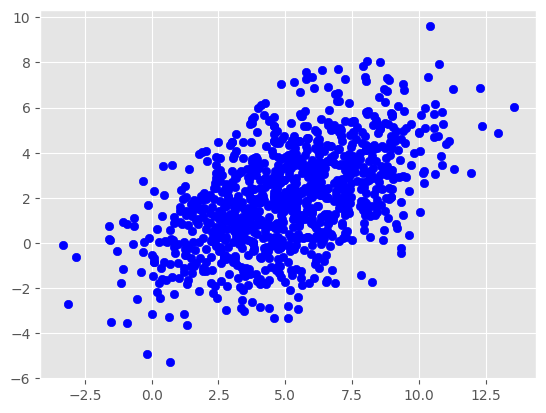

In [96]:
plt.scatter(data[:,0],data[:,1],c='b')

#  Lets go and compute the Mahalanobis distance using Covariance matrix & its Eigen Vectors

#### Task 1: Calculate the Covariance Matrix for the Given Data ....

In [97]:
#calculate its covariance matrix...
import numpy as np
covariance = np.cov(data , rowvar=False)
print(f"covariance matrix is {covariance}")

covariance matrix is [[6.9762706  3.19407896]
 [3.19407896 5.18443349]]


#### Task 2 : Decompose the Covariance Matrix by computing the Eigen Vectors & Values

In [98]:
# You can use the np.lingalg.eigh function to calculate
# the eigen values & eigen vectors.
# Remember eigh returns the eigen values & vectors in  ascending (not descending) order

eigenvalues, eigenvectors = np.linalg.eigh(covariance)
print(f"Eigen Values are {eigenvalues}")
print(f"Eigen Vectors are {eigenvectors[0]}")
print(f"Eigen Vectors are {eigenvectors[1]}")

Eigen Values are [2.76300213 9.39770195]
Eigen Vectors are [ 0.6041231  -0.79689101]
Eigen Vectors are [-0.79689101 -0.6041231 ]


#### Task 3: Unit Normalize both the eigen vectors, and build a 2x2 projection matrix

In [99]:
eigenvectors_normalized = eigenvectors / np.linalg.norm(eigenvectors, axis=0)
eigenvectors_normalized1 = eigenvectors[0] / np.linalg.norm(eigenvectors[0], axis=0)
eigenvectors_normalized2 = eigenvectors[1] / np.linalg.norm(eigenvectors[1], axis=0)


print(eigenvectors_normalized1)
print(eigenvectors_normalized2)

print("Projection Matrix is \n")
projection_matrix = np.column_stack((eigenvectors_normalized1, eigenvectors_normalized2))
print(projection_matrix)

[ 0.6041231  -0.79689101]
[-0.79689101 -0.6041231 ]
Projection Matrix is 

[[ 0.6041231  -0.79689101]
 [-0.79689101 -0.6041231 ]]


#### Task 4: Plot the Computed Unit Eigen Vectors, Scaled by corresponding Eigen Values

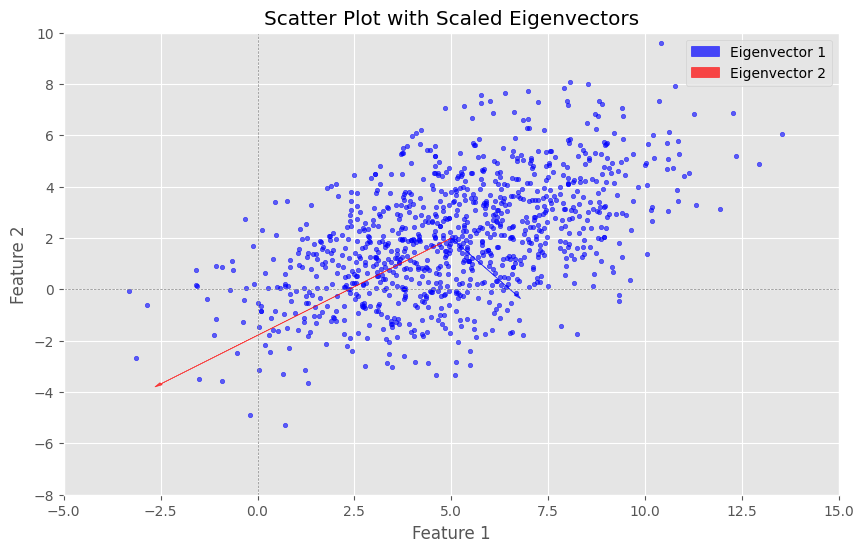

In [100]:
import matplotlib.pyplot as plt

scaled_eigenvectors1 = eigenvectors_normalized1 * eigenvalues[0]
scaled_eigenvectors2 = eigenvectors_normalized2 * eigenvalues[1]



# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.6, s=10)

# Plot the first eigenvector
plt.arrow(5, 2, scaled_eigenvectors1[0], scaled_eigenvectors1[1],
          head_width=0.1, head_length=0.2, fc='blue', ec='blue', alpha=0.7,
          label='Eigenvector 1')

# Plot the second eigenvector
plt.arrow(5, 2, scaled_eigenvectors2[0], scaled_eigenvectors2[1],
          head_width=0.1, head_length=0.2, fc='red', ec='red', alpha=0.7,
          label='Eigenvector 2')

plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)

plt.xlim(-5, 15)
plt.ylim(-8, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Scaled Eigenvectors')
plt.legend()
plt.grid(True)
plt.show()

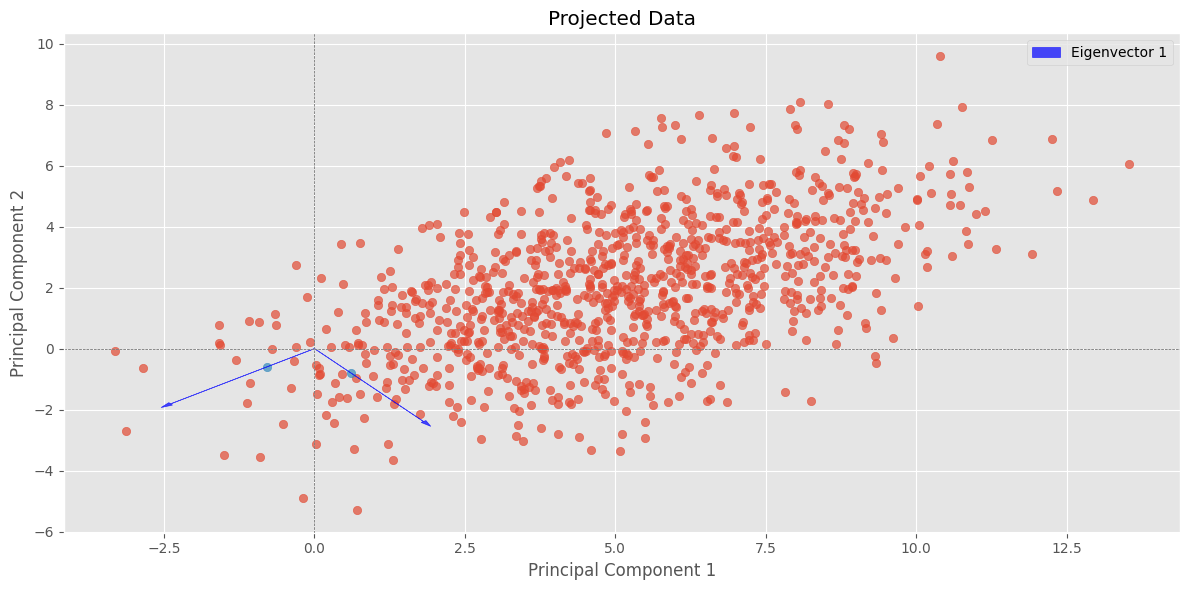

In [101]:
# Plotting
plt.figure(figsize=(12, 6))

# Original Data Plot

plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)

plt.scatter(projection_matrix[:, 0], projection_matrix[:, 1], alpha=0.7)
plt.title('Projected Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)

# Plot the eigenvectors
for i in range(eigenvectors_normalized.shape[1]):
    plt.arrow(0, 0, eigenvectors_normalized[0, i] * 3, eigenvectors_normalized[1, i] * 3,
              head_width=0.1, head_length=0.2, fc='blue', ec='blue', alpha=0.7,
              label=f'Eigenvector {i+1}' if i == 0 else "") 

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##### Just notice the  variance in scale of data... now lets scale it with corresponding Eigen Values (which represent variance or their sqrt which represent std...)...

#### Task 6:  Now lets project across these unit directions and scale by the Square-Root of Corresponding Eigen Values
You should notice that now the data lies in range [-3,3], i.e. 3 standard deviations.

Just a side note, if instead you divide by the eigen values instead of sqrt of them, you will have majority of data lying in the range [-1, 1] in both dimensions

### L2 distance in this projected spaces is equal to Mahalanobis distance.
---------------------


##### Task 7: Now lets compute the L2 distance in this projected space between two randomly choosen points, which will be same as calculating the Mahalanobis


In [102]:
idxp1=np.random.randint(data.shape[0])
idxp2=np.random.randint(data.shape[0])

##### Task 7a: write code for computing the L2 distance between these points in the projected space

In [107]:
projected_data1 = np.dot(data, eigenvectors_normalized1)
projected_data2 = np.dot(data , eigenvectors_normalized2)

projection_u1_scaled = projected_data1/np.sqrt(eigenvalues[0])
projection_u2_scaled = projected_data2/np.sqrt(eigenvalues[1])
transformed_data = np.column_stack((projection_u1_scaled , projection_u2_scaled))
point1 = transformed_data[idxp1]
point2 = transformed_data[idxp2]

l2_distance = np.linalg.norm(point1-point2)

print(f"Point 1: {point1}")
print(f"Point 2: {point2}")
print(f"L2 Distance: {l2_distance}")

Point 1: [ 0.06863099 -0.08294092]
Point 2: [-0.60028934 -1.23521722]
L2 Distance: 1.3323644690379235


##### Task 7b: write code for computing the Mahalanobis distance between these points in the original space

In [114]:
from scipy.spatial.distance import mahalanobis

cov_matrix = np.cov(data.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)


mahalanobis_distance = mahalanobis(point1, point2, inv_cov_matrix)

print(f"Point 1: {point1}")
print(f"Point 2: {point2}")
print(f"Mahalanobis Distance: {mahalanobis_distance}")

Point 1: [ 0.06863099 -0.08294092]
Point 2: [-0.60028934 -1.23521722]
Mahalanobis Distance: 0.5063958943241065


In [40]:
# Now print both the distances and they must be equal
print (l2dist, mdist)

2.28695753911 2.28695753911
